In [41]:
# displaying all prints in one frame
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
## image video and HTML import
from IPython.display import HTML, Image, Video

In [70]:
# HTML('<iframe width="450" height="350" src="https://youtu.be/Ux7ljatD3pQ" frameborder="0" allowfullscreen></iframe>')
# Video("intro_Trim.mp4", embed=True)
HTML("""
    <video width="450" height="300" controls>
        <source src="intro_Trim.mp4" type="video/mp4">
    </video>
""")

# Challenge 01: Aktienkurse visualisieren

Heute sind wir in der Finanzwelt und werden Aktienkurse visualisieren. Als Data Analyst und Data Scientist ist es sehr wichtig mit aussagekräftigen, vereinfachten Visualisierungen deine Handlungsempfehlungen zu bestärken und zu erklären. Wir wollen hier den Aktienkurs von Facebook über die letzten 30 Tage visualiseren.

Diese Challenge besteht aus 4 Schritten. Dabei erlernst du das Laden von Paketen, Datenimport und Datenwrangling und eine erste Visualisierung. Viel Erfolg!

Vermerk:
- **dick** geschriebene Wörter sind Namen
- *kursiv* geschriebene Wörter sind Funktionen, die du mit einem Punkt (.) an deiner Datentabelle anwenden kannst


### 01-00: Paket laden
Mit dem Befehl *import* sagst du, dass du ein Paket laden möchtest. **pandas** ist ein gängig genutztes Paket, wenn man Daten analysieren möchte. Wir wollen **pandas** als **pd** abkürzen. Um eine Funktion aus einem Paket zu nutzen, wird die Abkürzung mit der Funktion mit einem Punkt (.) angewendet.

"""Aufgabe: Lade das Paket wie in den folgenden Beispielen.

Beispiel: 


import numpy as np

np.square(array)

In [42]:
# import numpy as np
# import matplotlib.pyplot as plt
import pandas as pd

Geladene Pakete
### 01-01: Datentabelle importieren

Um genau deine Daten zu analysieren, solltest du in der Lage sein sie ordentlich in Python zu importieren.

Mit der Funktion des **panda**-Pakets *read_csv(*"\[Dateiname.csv\]"*)* kannst du eine CSV-Datei in Python importieren. *read_excel(*"\[Dateiname.xsl\]"*)* aus dem gleichen Paket ist das Pendant für eine Excel-Datei.

In dieser Challenge ist unsere Datentabelle als csv-Datei abgelagert. Dieser Dateiformat wird gern genutzt, da sie wenig Speicherplatz benötigt. **csv** steht für comma separated values. Die Werte sollten dementsprechend mit Kommas separiert sein. Das ist nicht immer so. Häufiger sind es zum Beispiel auch Tabs oder Semikolons.

Falls du aktuellere Daten von Facebook laden möchtest, gehe auf den folgenden Link und speichere die CSV-Datei in den Ordner, wo auch diese Challenge liegt. Falls du den Link nicht siehst, maximiere dein Fenster und schau rechts oberhalb der Tabelle nochmal genauer.

http://www.nasdaq.com/symbol/fb/historical 

"""Aufgabe: Lade die Tabelle **HistoricalQuotes.csv** in Python hoch und speichere sie als Variable **df**. 

Hinweis: schaue dabei das obige Beispiel bei dem Schritt 01-00 an.

In [43]:
df = pd.read_csv("HistoricalQuotes.csv")

### 01-02: Datenübersicht
Bei diesen Daten wirst du die Aufgaben des Data Wranglings oder Datenpräparation erfahren. Um eine erste Übersicht zu bekommen, helfen dir die Funktionen *head()*, *shape* und *dtypes*. Diese Funktionen können dir auch im Laufe der Challenge helfen, einen Überblick zu erschaffen.

- *head()* zeigt dir den Inhalt der ersten 5 Zeilen an, um zu schauen, ob der Import richtig funktioniert hat.
- *shape* gibt dir an, wieviele Zeilen und Spalten wir in der Tabelle haben.
- *dtypes* zeigt dir an, welche Spalte als ganze Zahl (int), Dezimalzahl (float), String (object) oder als binäre Variable (bool) erkannt wird.

"""Aufgabe: Wende alle drei Funktionen auf **df** an.

In [44]:
print("df.head():")
df.head()
print("df.shape:")
df.shape
print("df.dtypes:")
df.dtypes

df.head():


,Date,Close/Last,Volume,Open,High,Low
0,12/16/2020,$275.67,15885000,$274.76,$277.86,$272.51
1,12/15/2020,$275.55,23979460,$274.83,$276.08,$267.47
2,12/14/2020,$274.19,16376880,$273.372,$277.22,$271.56
3,12/11/2020,$273.55,14391400,$274.53,$276.48,$270.25
4,12/10/2020,$277.12,20065090,$275.535,$278.73,$271.86


df.shape:


(21, 6)

df.dtypes:


Date           object
 Close/Last    object
 Volume         int64
 Open          object
 High          object
 Low           object
dtype: object

In [59]:
# HTML('<iframe width="560" height="315" src="https://youtu.be/Ux7ljatD3pQ" frameborder="0" allowfullscreen></iframe>')
# Video("data_wrangling/data_wrangling_Trim.mp4", embed=True)
HTML("""
    <video width="380" height="240" controls>
        <source src="data_wrangling/data_wrangling_Trim.mp4" type="video/mp4">
    </video>
""")

![Datenpräparation](data_wrangling/img/data_wrangling01_marked.png)

### 01-03: Datenpräparation
Lass uns beginnen tiefer in die Datenmatiere zu gehen, um mögliche Fehler in Struktur und Inhalt zu korrigieren.

Die Tabellenindizes kannst du mit der Funktion *iloc* selektieren. Die neue Tabelle nennen wir **df2**.

Beispiele:

df.iloc\[ 1:3, : \]                für die Zeilenindizes 1 bis 3, und alle Spalten

df.iloc\[ \[0,21\], \[1:5\] \]     für die Zeilenindizes 0 und 21, und Spaltenindizes 1 bis 5

"""Aufgabe: Strukturiere die Tabelle **df2** um. Die Spalte **Volume** interessiert uns nicht und setze **Open** und **Close/Last** und **Low** und **High** nebeneinander. 


In [46]:
## keep only the columns that are important for you and change the order
## safe in a new variable df2
df2 = df.iloc[ :, [0, 3, 1, 5, 4]]
df2.head()

,Date,Open,Close/Last,Low,High
0,12/16/2020,$274.76,$275.67,$272.51,$277.86
1,12/15/2020,$274.83,$275.55,$267.47,$276.08
2,12/14/2020,$273.372,$274.19,$271.56,$277.22
3,12/11/2020,$274.53,$273.55,$270.25,$276.48
4,12/10/2020,$275.535,$277.12,$271.86,$278.73


Ab jetzt arbeiten wir nur mit der kleineren Tabelle **df2**.

Schaue dir nun die Spaltennamen mit der Funktion *columns* an.

In [47]:
## change column names
df2.columns

Index(['Date', ' Open', ' Close/Last', ' Low', ' High'], dtype='object')

Wenn du etwas genauer hinschaust, siehst du, dass in den Spaltennummern 1 bis 4 ein unnötiges Leerzeichen in der Zeichenkette vorliegt. Die Spalte **Close/Last** kann auch vereinfacht werden zu **Close**.

"""Aufgabe: Benenne die Spaltennamen der Tabelle **df2** mit dem gleichen Befehl um. 

Hinweis: Wie bei einem Array.

In [48]:
df2.columns = ["Date", "Open", "Close", "Low", "High"]

Im Video 01-02 wurde kurz erwähnt, dass die Spalte **Date** nicht richtig formatiert ist. Um sie als Datum zu erkennen, kannst du die Funktion *to_datetime()* vom Paket **pd** nutzen.

Beispiel: Format umwandeln von "13.12.2020" in "2020-12-13" 

data\["Datum"\] = pd.to_datetime(data\["Datum"\], format="%d.%m.%Y")

"""Aufgabe: Ändere den Typ der Spalte **Date**. 

In [49]:
## change type of columns
# column 0 as datetime
df2["Date"] = pd.to_datetime(df2["Date"], format="%m/%d/%Y")

Mit der Funktion *sort_values(by="**Spaltenname**")* kannst du die Spalten (a-)chronologisch/analphabetischer Reihenfolge sortieren.
 
Beispiel: 

data.sort_values(by="time", ascending=True)

"""Aufgabe: Sortiere die Tabelle **df2** nach der Spalte *Date* in chronologischer Reihenfolge.

In [50]:
## sort values by date, ascending
df2 = df2.sort_values(by="Date", ascending=True)
df2.head()

,Date,Open,Close,Low,High
20,2020-11-17,$277.68,$275,$273.29,$277.68
19,2020-11-18,$274.52,$271.97,$271.84,$277.3889
18,2020-11-19,$271.025,$272.94,$269.19,$273.47
17,2020-11-20,$272.56,$269.7,$269.41,$273
16,2020-11-23,$270.89,$268.43,$264.53,$270.9471


Im Video 01-02 wurde auch erwähnt, dass die restlichen Spalten nicht als Zahl erkannt wurden, sondern als String. Das liegt am Dollar-Zeichen. Um dieses Zeichen loszuwerden, kannst du die Funktion *replace("**zu ersetzendes Zeichen**", "**neues Zeichen**") mit dem Argument *regex = True* nutzen.

Beispiel: Entferne das Prozentzeichen bei **text**.

text = "abc%"
text.replace("\%,"", regex=True)

"""Aufgabe: Ersetze bei **df2** alle "$" mit "".


In [51]:
## remove dollar signs $
# df2.iloc[:, 1:] = df2.iloc[:, 1:].replace("\$","", regex=True)
df2 = df2.replace("\$","", regex=True)
df2.head()

,Date,Open,Close,Low,High
20,2020-11-17,277.68,275,273.29,277.68
19,2020-11-18,274.52,271.97,271.84,277.3889
18,2020-11-19,271.025,272.94,269.19,273.47
17,2020-11-20,272.56,269.7,269.41,273
16,2020-11-23,270.89,268.43,264.53,270.9471


Um nun die Spalten **Open**, **Close**, **Low** und **High** als Dezimalzahlen zu formatieren, können wir die Funktion *astype()* mit einem Wörterbuch (dictionary) nutzen.

Beispiel:

data.astype({"**Spaltenname1**": "int", "**Spaltenname2**: "float"})

"""Aufgabe: Formatiere die eben genannten Spalten als Dezimalzahlen.

In [52]:
# columns 1 to 4 as float
# df2.iloc[:, 1:] = df2.iloc[:, 1:].astype(float)
df2 = df2.astype({"Open": float, "Close": float, "Low": float, "High": float})
df2.dtypes
df2.head()

Date     datetime64[ns]
Open            float64
Close           float64
Low             float64
High            float64
dtype: object

,Date,Open,Close,Low,High
20,2020-11-17,277.680,275.00,273.29,277.6800
19,2020-11-18,274.520,271.97,271.84,277.3889
18,2020-11-19,271.025,272.94,269.19,273.4700
17,2020-11-20,272.560,269.70,269.41,273.0000
16,2020-11-23,270.890,268.43,264.53,270.9471


Wenn Zahlenspalten in der Tabelle erkannt werden, dann zeigt die Funktion *describe()* eine übersichtliche, beschreibende Statistik über die einzelnen Spalten. Dabei werden von oben Anzahl , Mittelwert, Standardabweichung, Mittelwert, Quantile und Maximalwert bestimmt.

"""Aufgabe: Wende die Funktion *describe()* bei **df2** an und überprüfe, ob deine Zahlformatierungen funktioniert haben. 

Hinweis: Du solltest deine vier Zahlenspalten sehen und ähnliche Statistiken bei den Spalten erkennen.

In [53]:
## show descriptive statistics for the columns that are of type numbers
df2.describe()

,Open,Close,Low,High
count,21.000000,21.000000,21.000000,21.000000
mean,277.127714,277.330000,273.329286,280.353481
std,5.031425,5.218604,4.883843,5.868307
min,268.490000,268.430000,264.530000,270.947100
25%,274.520000,274.190000,270.250000,277.220000
50%,276.030000,276.920000,271.860000,277.860000
75%,279.190000,279.700000,278.200000,286.427200
max,286.250000,287.520000,281.550000,291.780000


### 01-03 Daten visualisieren
Nun hast du deine Datentabelle so weit vorbereitet, dass du ohne Schwierigkeiten eine Visualisierung (Plots) erstellen kannst. Die einfachste und für einen Zeitverlauf sinnvolle Darstellung ist ein Liniengraph, den du mit der Funktion *plot(**Spaltenname für x-Achse**, **Spaltenname für y-Achse**)* erzeugst.

"""Aufgabe: Erstelle ein Liniengraph von allen Zahlenspalten aus **df2** in Bezug auf das Datum.

Hinweis: Du kannst auch mehrere Spalten für **y** einsetzen, die mit **x** in Beziehung gebracht werden. Dafür setzt du sie in eckige Klammern.


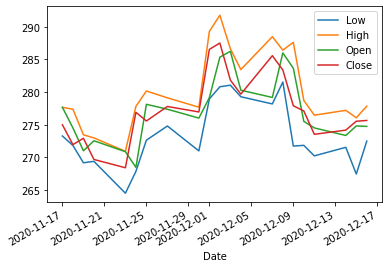

In [73]:
df2.plot(x="Date", y=["Low", "High", "Open", "Close"])
# df2.plot(x="Date", y=["Open", "Close"])
# df2.plot(x="Date", y="Open")


Die Plots können modifiziert werden. Da können wir bei der Achsenbeschriftung anfangen. Diese Funktionen heißen *set_ylabel("**Label für Y-Achse**") und *set_xlabel("**Label für X-Achse**").

"""Aufgabe: Übernehme die obere Zeile und speichere sie als Variable. Dann nenne die X- und Y-Achse in "Datum" und "Kurswert \[$\]" um.

Text(0, 0.5, 'Kurswert [$]')

Text(0.5, 0, 'Datum')

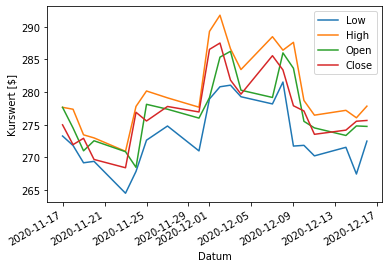

In [56]:
ax = df2.plot(x="Date", y=["Low", "High", "Open", "Close"])
ax.set_ylabel("Kurswert [$]")
ax.set_xlabel("Datum")

## this might be part of the following challenge
# df2.plot.scatter(x="Low", y="High")
# df2.iloc[:, 1:].corr("pearson")

Bravo, du hast die erste Challenge geschafft!


In [69]:
# HTML('<iframe width="450" height="350" src="https://youtu.be/Ux7ljatD3pQ" frameborder="0" allowfullscreen></iframe>')
# Video("schlusswort_Trim.mp4", embed=True)
HTML("""
    <video width="450" height="300" controls>
        <source src="schlusswort_Trim.mp4" type="video/mp4">
    </video>
""")